<a href="https://colab.research.google.com/github/Paulsob/TelecomLabs/blob/main/Lab2_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Упржнение 2

In [2]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
import thinkdsp
import numpy as np

--2025-05-14 16:54:50--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2025-05-14 16:54:50--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48554 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.42K  --.-KB/s    in 0.008s  

2025-05-14 16:54:51 (5.50 MB/s) - ‘thinkdsp.py’ saved [48554/48554]



Пункт 2

In [4]:
class SawtoothSignal(thinkdsp.Sinusoid):
    def evaluate(self, ts):
        cycles = self.freq * ts + self.offset / np.pi / 2
        frac, _ = np.modf(cycles)
        ys = thinkdsp.normalize(thinkdsp.unbias(frac), self.amp)
        return ys

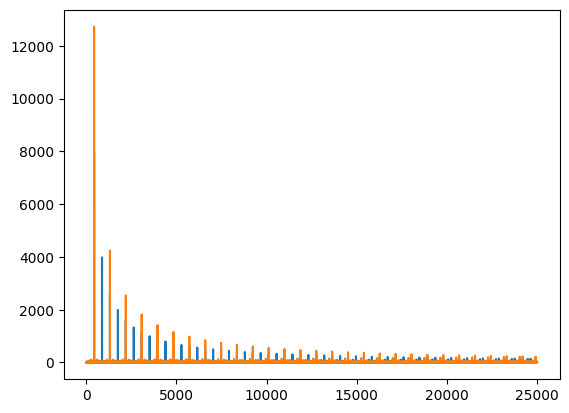

In [5]:
sawtooth_spec = SawtoothSignal().make_wave(duration=0.5, framerate=50000).make_spectrum()
square_spec = thinkdsp.SquareSignal(amp=0.8).make_wave(duration=0.5, framerate=50000).make_spectrum()
triangle_spec = thinkdsp.TriangleSignal(amp=0.8).make_wave(duration=0.5, framerate=50000).make_spectrum()
sawtooth_spec.plot()
square_spec.plot()

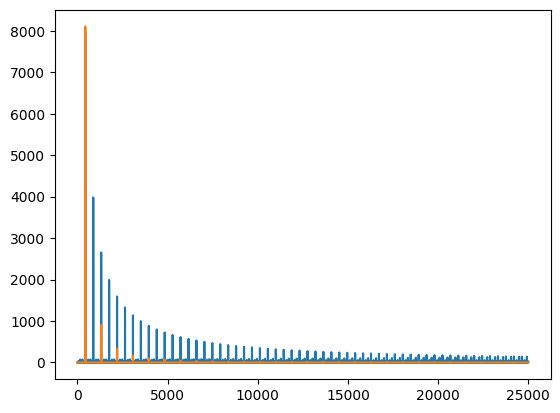

In [ ]:
sawtooth_spec.plot()
triangle_spec.plot()

Пункт 3

In [ ]:
square_signal: thinkdsp.SquareSignal = thinkdsp.SquareSignal(freq=1100)
square_wave: thinkdsp.Wave = square_signal.make_wave(duration=0.5, framerate=10000)

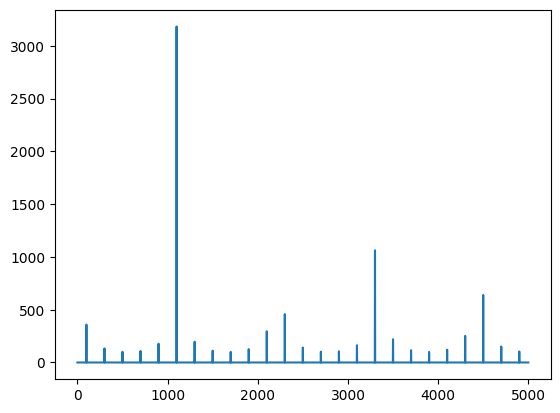

In [ ]:
square_spectrum: thinkdsp.Spectrum = square_wave.make_spectrum()
square_spectrum.plot()

In [ ]:
square_wave.make_audio()

Пункт 4

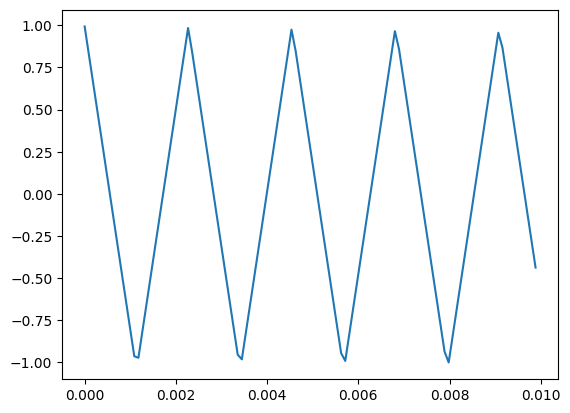

In [15]:
triangle_wave = thinkdsp.TriangleSignal(freq=440).make_wave(duration=0.01)
triangle_wave.plot()

In [16]:
triangle_spectrum = triangle_wave.make_spectrum()
triangle_spectrum.hs[0]

np.complex128(1.0436096431476471e-14+0j)

Полученное значение — комплексное число, где мнимая часть равна нулю, а действительная имеет очень малое значение порядка (10^{-14}).

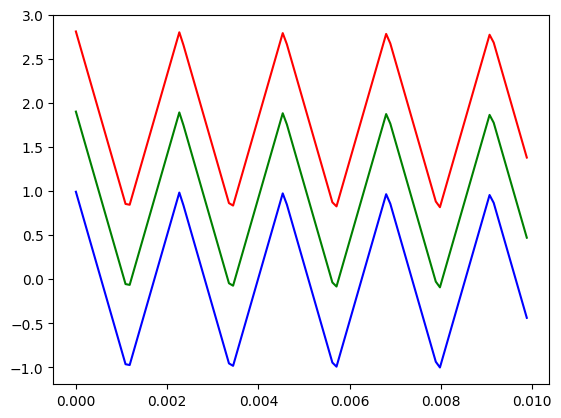

In [17]:
triangle_wave.plot(color='blue')

triangle_spectrum.hs[0] = 100
triangle_spectrum.make_wave().plot(color='green')

triangle_spectrum.hs[0] = 200
triangle_spectrum.make_wave().plot(color='red')

Пункт 5

In [28]:
def alter_spectrum(s: thinkdsp.Spectrum):
  s.hs[0] = 0
  for i in range(1, len(s.hs)):
    s.hs[i] /= s.fs[i]

Прямоуголный сигнал

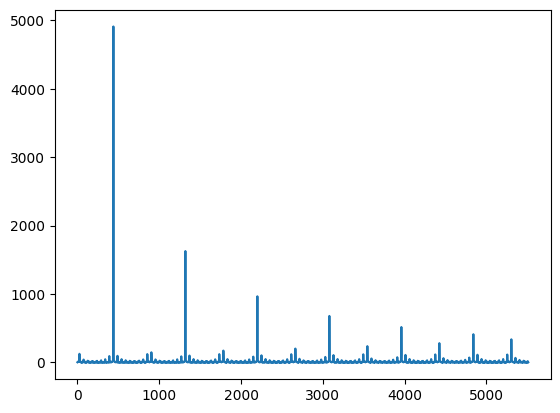

In [29]:
sq_wave = thinkdsp.SquareSignal().make_wave(duration=0.7)
sq_spectrum = sq_wave.make_spectrum()
sq_spectrum.plot()
sq_wave.make_audio()

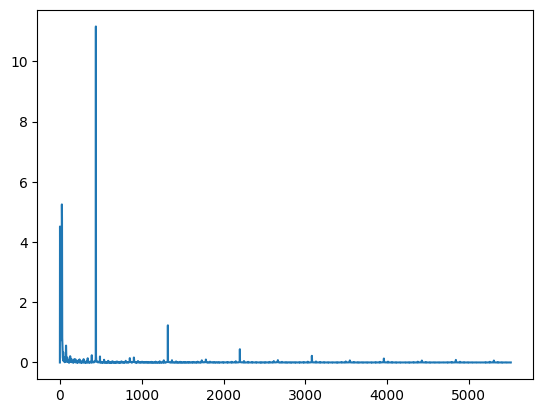

In [30]:
alter_spectrum(sq_spectrum)
sq_spectrum.plot()
sq_spectrum.make_wave().make_audio()

Треуголный сигнал

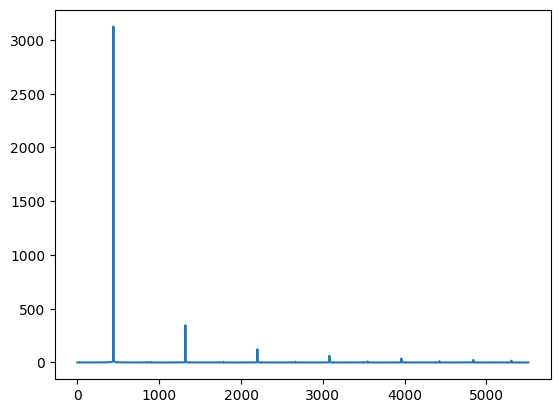

In [31]:
tr_wave = thinkdsp.TriangleSignal().make_wave(duration=0.7)
tr_spectrum = tr_wave.make_spectrum()
tr_spectrum.plot()
tr_wave.make_audio()

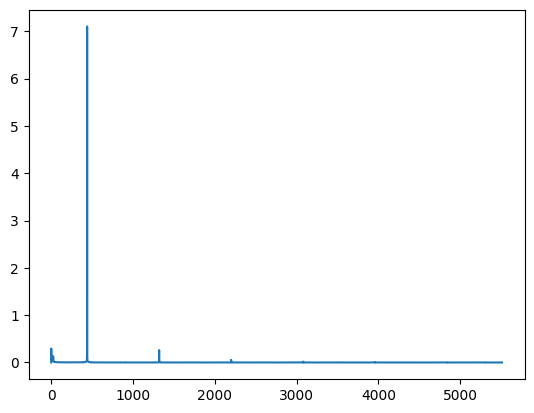

In [32]:
alter_spectrum(tr_spectrum)
tr_spectrum.plot()
tr_spectrum.make_wave().make_audio()

Пилообразный сигнал

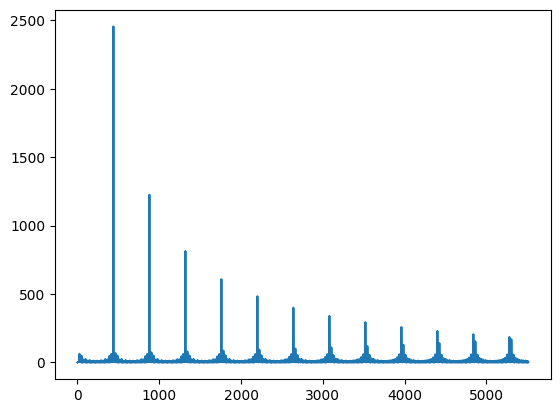

In [33]:
st_wave = thinkdsp.SawtoothSignal().make_wave(duration=0.7)
st_spectrum = st_wave.make_spectrum()
st_spectrum.plot()
st_wave.make_audio()

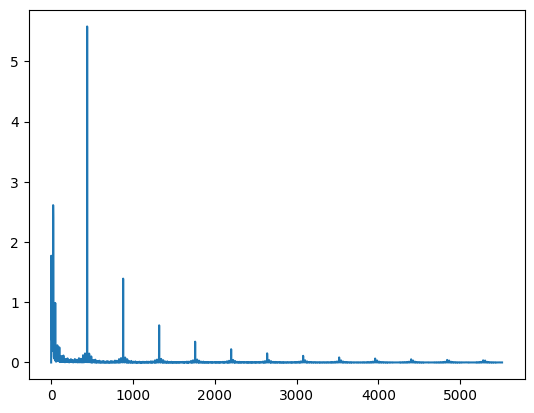

In [34]:
alter_spectrum(st_spectrum)
st_spectrum.plot()
st_spectrum.make_wave().make_audio()

пункт 6

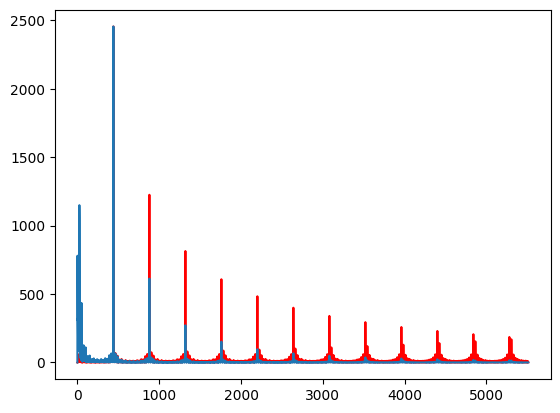

In [35]:
st = thinkdsp.SawtoothSignal(freq=440).make_wave(duration=0.7).make_spectrum()
st.plot(color='red')
alter_spectrum(st)
st.scale(440)
st.plot()